In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [4]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)  
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        

train acc, test acc | 0.93065, 0.932
train acc, test acc | 0.9330833333333334, 0.9336
train acc, test acc | 0.9350833333333334, 0.9363
train acc, test acc | 0.9392666666666667, 0.9374
train acc, test acc | 0.9403666666666667, 0.9391
train acc, test acc | 0.9428833333333333, 0.9412
train acc, test acc | 0.9441333333333334, 0.9418
train acc, test acc | 0.9458833333333333, 0.9433
train acc, test acc | 0.9480666666666666, 0.9448
train acc, test acc | 0.9491333333333334, 0.9473
train acc, test acc | 0.9508833333333333, 0.9477
train acc, test acc | 0.9514666666666667, 0.9485
train acc, test acc | 0.9534833333333333, 0.9505
train acc, test acc | 0.9546666666666667, 0.9513
train acc, test acc | 0.956, 0.9513
train acc, test acc | 0.9567, 0.9529
train acc, test acc | 0.9578166666666666, 0.9532


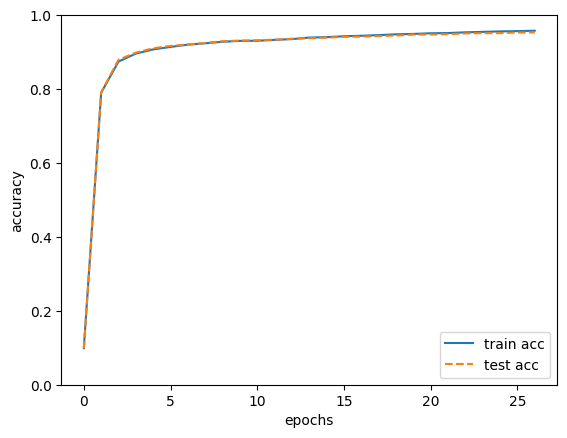

In [5]:
# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()